In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings(action = 'ignore')
from scipy.stats import beta
from sklearn.naive_bayes import GaussianNB
import sklearn.linear_model as LM
from sklearn.model_selection import cross_val_score,cross_validate,train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc,accuracy_score,precision_recall_curve

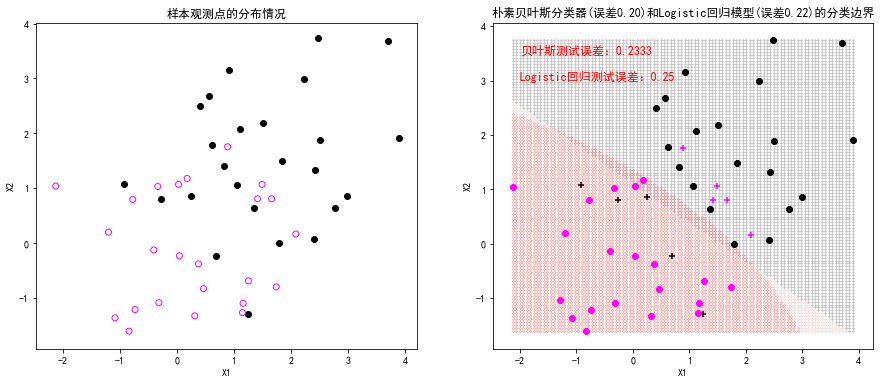

In [2]:
np.random.seed(123)
N=50
n=int(0.5*N)
X=np.random.normal(0,1,size=100).reshape(N,2)
Y=[0]*n+[1]*n
X[0:n]=X[0:n]+1.5

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
axes[0].scatter(X[:n,0],X[:n,1],color='black',marker='o')
axes[0].scatter(X[(n+1):N,0],X[(n+1):N,1],edgecolors='magenta',marker='o',c='')
axes[0].set_title("样本观测点的分布情况")
axes[0].set_xlabel("X1")
axes[0].set_ylabel("X2")

modelNB = GaussianNB()
modelNB.fit(X, Y)
modelLR=LM.LogisticRegression()
modelLR.fit(X,Y)
Data=np.hstack((X,np.array(Y).reshape(N,1)))
Yhat=modelNB.predict(X)
Data=np.hstack((Data,Yhat.reshape(N,1)))
Data=pd.DataFrame(Data)

X1,X2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),100), np.linspace(X[:,1].min(),X[:,1].max(),100))
New=np.hstack((X1.reshape(10000,1),X2.reshape(10000,1)))
YnewHat1=modelNB.predict(New)
DataNew=np.hstack((New,YnewHat1.reshape(10000,1)))
YnewHat2=modelLR.predict(New)
DataNew=np.hstack((DataNew,YnewHat2.reshape(10000,1)))
DataNew=pd.DataFrame(DataNew)

for k,c in [(0,'silver'),(1,'red')]:
    axes[1].scatter(DataNew.loc[DataNew[2]==k,0],DataNew.loc[DataNew[2]==k,1],color=c,marker='o',s=1)
for k,c in [(0,'silver'),(1,'mistyrose')]:
    axes[1].scatter(DataNew.loc[DataNew[3]==k,0],DataNew.loc[DataNew[3]==k,1],color=c,marker='o',s=1)

axes[1].scatter(X[:n,0],X[:n,1],color='black',marker='+')
axes[1].scatter(X[(n+1):N,0],X[(n+1):N,1],color='magenta',marker='+')
for k,c in [(0,'black'),(1,'magenta')]:
    axes[1].scatter(Data.loc[(Data[2]==k) & (Data[3]==k),0],Data.loc[(Data[2]==k) & (Data[3]==k),1],color=c,marker='o')
axes[1].set_title("朴素贝叶斯分类器(误差%.2f)和Logistic回归模型(误差%.2f)的分类边界"%(1-modelNB.score(X,Y),1-modelLR.score(X,Y)))
axes[1].set_xlabel("X1")
axes[1].set_ylabel("X2")

np.random.seed(123)
k=10
CVscore=cross_validate(modelNB,X,Y,cv=k,scoring='accuracy',return_train_score=True) 
axes[1].text(-2,3.5,'贝叶斯测试误差：%.4f' %(1-CVscore['test_score'].mean()),fontsize=12,color='r')
CVscore=cross_validate(modelLR,X,Y,cv=k,scoring='accuracy',return_train_score=True) 
axes[1].text(-2,3,"Logistic回归测试误差：%.2f" %(1-CVscore['test_score'].mean()),fontsize=12,color='r')
plt.show()

说明： 1、这里通过模拟研究，通过朴素贝叶斯分类器和Logistic回归模型的对比，加深对朴素贝叶斯分类器基本原理和决策边界的理解。 2、数据模拟方案为：随机生成两组各50个服从标准正态分布的随机数，分别作为输入变量X1和X2。然后，指定相应样本观测点（X1,X2）对应的输出变量Y取值为0或1，0和1的各占50%。最后，调整输出变量Y等于0的样本观测点在2为空间中的位置。 3、引用sklearn.naive_bayes中的GaussianNB包采用高斯朴素贝叶斯分类器，对模拟数据进行分类预测建模。同时也采用Logistic回归模型进行分类预测。两个模型（分类器）的训练误差相等。 4、为绘制贝叶斯分类器和Logistic回归模型的分类边界，利用Numpy的meshgrid函数分布生成X1和X2取值范围内均匀分布的10000个样本观测点。利用前面所建立的贝叶斯分类器和Logistic回归模型给出10000个样本观测点输出变量的取值。 5、贝叶斯分类器和Logistic回归模型的分类边界的可视化中，采用不同颜色区分两个模型的分类边界。 6、Python代码的for循环中可以指定两个循环控制变量，如这里的k和c。循环中控制变量的取值决于in的指定，如第一次循环k和c分别取0和silver，第二次循环k和c分别取1和red。

In [3]:
np.random.seed(123)
k=10
CVscore=cross_validate(modelNB,X,Y,cv=k,scoring='accuracy',return_train_score=True) 
print('朴素贝叶斯分类器10折交叉验证：训练错误率:%.4f 测试错误率：%.4f' %(1-CVscore['train_score'].mean(),1-CVscore['test_score'].mean()))
CVscore=cross_validate(modelLR,X,Y,cv=k,scoring='accuracy',return_train_score=True) 
print("Logistic回归10折交叉验证：训练错误率:%.4f 测试错误率：%.4f" %(1-CVscore['train_score'].mean(),1-CVscore['test_score'].mean()))


朴素贝叶斯分类器10折交叉验证：训练错误率:0.2134 测试错误率：0.2333
Logistic回归10折交叉验证：训练错误率:0.2269 测试错误率：0.2500


说明：
1、这里，基于上述模拟数据，比较朴素贝叶斯分类器和Logistic回归模型的训练误差和测试误差。
2、采用10折交叉验证法，分别计算两个模型的训练误差和测试误差。这里，scoring='accuracy'表示输出模型精度的测度指标，即正确分类的比率。